## 6_10.ガウスカーネルのサポートベクター回帰

In [1]:
"""「California Housing」の前処理
"""
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# データセットをダウンロードしてndarrayを要素としたdictオブジェクトに格納
housing = fetch_california_housing()
# データセットをデータフレームに読み込む
# dictオブジェクトhousingからdataキーを指定して8項目のデータを抽出
# dictオブジェクトhousingからfeature_namesキーを指定して列名を抽出
df_housing = pd.DataFrame(
    housing.data, columns=housing.feature_names)

# 説明変数のデータをNumPy配列に格納
X = df_housing.values
# 目的変数のデータをNumPy配列に格納
y = housing.target

# 説明変数のデータと目的変数のデータを8:2の割合で分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

"""対数変換
"""
# 'AveBedrms''AveOccup''Population''AveRooms'の列インデックスを取得
bed_index = (df_housing.columns.get_loc('AveBedrms'))
occ_index = (df_housing.columns.get_loc('AveOccup'))
pop_index = (df_housing.columns.get_loc('Population'))
room_index = (df_housing.columns.get_loc('AveRooms'))
# 訓練データの'AveBedrms''AveOccup''Population'のデータを対数変換する
X_train[:,bed_index] = np.log10(X_train[:,bed_index])
X_train[:,occ_index] = np.log10(X_train[:,occ_index])
X_train[:,pop_index] = np.log10(X_train[:,pop_index])
X_train[:,room_index] = np.log10(X_train[:,room_index])
# テストデータの'AveBedrms''AveOccup''Population''AveRooms'のデータを対数変換する
X_test[:,bed_index] = np.log10(X_test[:,bed_index])
X_test[:,occ_index] = np.log10(X_test[:,occ_index])
X_test[:,pop_index] = np.log10(X_test[:,pop_index])
X_test[:,room_index] = np.log10(X_test[:,room_index])

"""標準化
"""
# 標準化を行うStandardScalerを生成
scaler = StandardScaler()
# 訓練データを標準化する
X_train_std = scaler.fit_transform(X_train)
# 訓練データの標準化に使用したStandardScalerでテストデータを標準化する
X_test_std = scaler.transform(X_test)

In [2]:
from sklearn.svm import SVR

# ガウスカーネルのサポートベクター回帰モデルを生成
# kernel='rbf'を指定する
model = SVR(kernel='rbf')
# 学習開始
model.fit(X_train_std, y_train)

SVR()

In [3]:
from sklearn.metrics import mean_squared_error
import numpy as np

# 訓練データ，テストデータをそれぞれモデルに入力して予測値を取得
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

# 訓練データ，テストデータのRMSEを求める
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print(np.sqrt(mean_squared_error(y_test, y_test_pred)))

0.523649143394056
0.5443059268013011


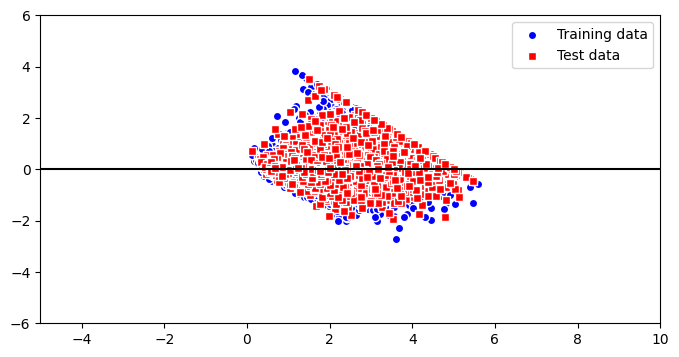

In [4]:
import matplotlib.pyplot as plt

# グラフの描画領域を設定
plt.figure(figsize=(8, 4))

# 訓練データを使用した予測値の残差をプロット
# x軸を予測値、y軸を残差にする
plt.scatter(
    y_train_pred,
    y_train - y_train_pred,
    color='blue', marker='o', edgecolor='white',
    label='Training data'
)

# テストデータを使用した予測値の残差をプロット
# x軸を予測値、y軸を残差にする
plt.scatter(
    y_test_pred,
    y_test - y_test_pred,
    color='red', marker='s', edgecolor='white',
    label='Test data'
)

# 残差0の水平線をプロット
plt.hlines(y=0, xmin=-5, xmax=10, color='black')
plt.xlim([-5, 10])
plt.ylim([-6, 6])
plt.legend()
plt.show()